In [49]:
import numpy as np
import matplotlib.pyplot as plt

nn = 30   #nc=10是勉强的，nc=8是不行的
E1, E2, w, nc = 0.32, 0.18, 0.057, nn

def fuhao(theta):
    if theta < 0:
        return -1
    else:
        return 1

#定义基频光电场：S方向
def Efs_field_sin2(t, theta=45):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >= -duration/2) & (t <= duration/2))
    result[idx] = (E1*np.sqrt(1/(1+np.tan(theta*np.pi/180)**2))*
          np.sin(w*(t[idx]-duration/2)/(2.*nc))**2*np.cos(w*t[idx]))
    return result

#定义基频光电场：P方向
def Efp_field_sin2(t,theta=45):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >= -duration/2) & (t <= duration/2))
    result[idx] = (E1*np.sqrt(np.tan(theta*np.pi/180)**2/(1+np.tan(theta*np.pi/180)**2))*
          np.sin(w*(t[idx]-duration/2)/(2.*nc))**2*fuhao(theta)*np.sin(w*t[idx]))
    return result

#定义倍频光电场矢势，倍频光是圆偏场
def Eds_field_sin2(t, DT):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >=- duration/2+DT*41.34) & (t <= duration/2+DT*41.34))
    result[idx] = (E2*np.cos(np.pi/4)* np.sin(w*(t[idx]-duration/2-DT*41.34)/(2.*nc))**2*
          np.cos(2*w*(t[idx]-DT*41.34)))
    return result

def Edp_field_sin2(t, DT):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >=- duration/2+DT*41.34) & (t <= duration/2+DT*41.34))
    result[idx] = (E2*np.sin(np.pi/4)* np.sin(w*(t[idx]-duration/2-DT*41.34)/(2.*nc))**2*
          np.sin(2*w*(t[idx]-DT*41.34)))
    return result


time1 = np.linspace(-1800., 1800., 4801)
time = np.linspace(0., 2.67*41.34, 400)
nt = len(time)
dt = time[1] - time[0]

tau0 = np.linspace(-15., 15., 420)

intensity_S, intensity_P = [], []
no = 0

Ei, Eh = 15.576/27.2116, 0.5  
r = Ei/Eh
def W(E):    #定义电离率
    E = 0.000001 + abs(E)
    return (4.0/E)*r**(5/2)*np.exp((-2/(3*E))*(r**(3/2)))

In [88]:
ES1 = Efs_field_sin2(time1) + Eds_field_sin2(time1, 0)    
EP1 = Efp_field_sin2(time1) + Edp_field_sin2(time1, 0)
ES = Efs_field_sin2(time) + Eds_field_sin2(time, 0)    
EP = Efp_field_sin2(time) + Edp_field_sin2(time, 0)
Efield = np.zeros(time.size, dtype=complex)
Efield.real = EP
Efield.imag = ES
E_abs = np.abs(Efield)
E_theta = np.angle(Efield)

Efield1 = np.zeros(time1.size, dtype=complex)
Efield1.real = EP1
Efield1.imag = ES1
E_abs1 = np.abs(Efield1)
E_theta1 = np.angle(Efield1)
theta = np.linspace(2.5*np.pi, 0.5*np.pi, time.size)

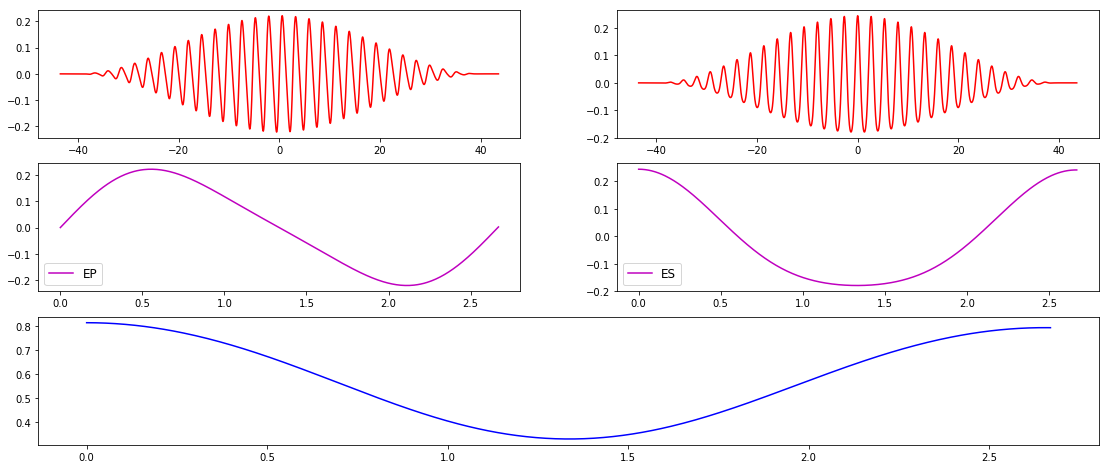

In [80]:
plt.figure(figsize=(19,8))
plt.subplot(321)
plt.plot(time1/41.34, EP1, color='r')
plt.subplot(323)
plt.plot(time/41.34, EP, color='m', label='EP')
plt.legend(loc=3, prop={'size':12})
plt.subplot(322)
plt.plot(time1/41.34, ES1, color='r')
plt.subplot(324)
plt.plot(time/41.34, ES, color='m', label='ES')
plt.legend(loc=3, prop={'size':12})
plt.subplot(313)
plt.plot(time/41.34, W(np.abs(Efield)), color='b')

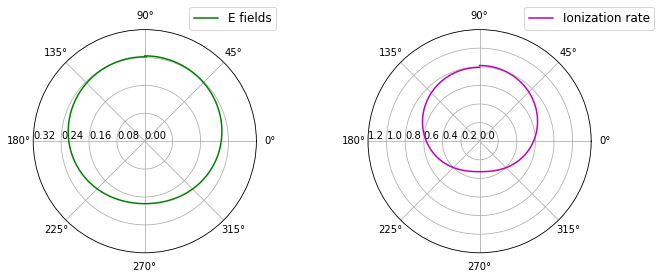

In [81]:
plt.figure(figsize=(10,5))
plt.subplot(121,polar=True)
plt.plot(E_theta,E_abs,linewidth=1.5,color="g",label="E fields")
plt.rgrids(np.arange(0,1.5*max(E_abs),0.08),angle=180)
plt.legend(loc=(0.7,1),prop={'size': 12})

plt.subplot(122,polar=True)
plt.plot(theta, W(np.abs(Efield)),linewidth=1.5,color="m",label="Ionization rate")
plt.rgrids(np.arange(0,1.5*max(W(np.abs(Efield))),0.2),angle=180)
plt.legend(loc=(0.7,1),prop={'size': 12})
plt.subplots_adjust(wspace=0.5)

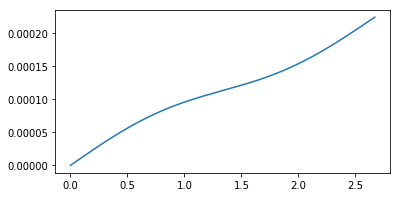

In [197]:
Ng = 2.4 * 10 ** 19 * (0.5292 * 10 ** (-8)) ** 3   #the initial density of neutral particles(~2.4*10^19 cm-3)
Ne, sumN = [0], 0
for k in range(time.size-1):
    sumN += Ng*0.5*(W(abs(E_abs[k]))+W(abs(E_abs[k]))) * dt  #梯形积分
    Ne.append(sumN)
plt.figure(figsize=(6,3))
plt.plot(time/41.34, Ne)

In [127]:
VP = np.zeros((time.size, time.size))
VS = np.zeros((time.size, time.size))
for i in range(time.size):
    for j in range(time.size-i):
        for k in range(j):
            VP[i,i+j] += -EP[i+k]*dt
            VS[i,i+j] += -ES[i+k]*dt

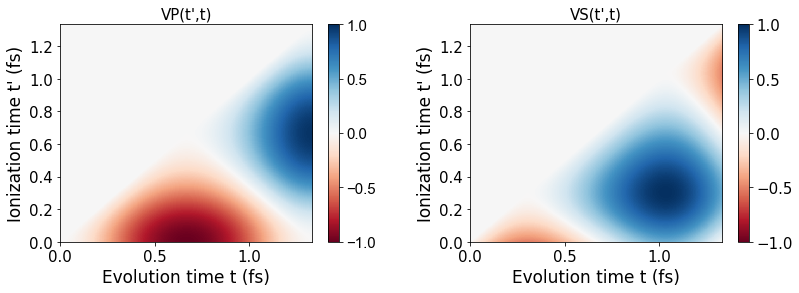

In [205]:
Size = 15
plt.figure(figsize=(13,4))
plt.subplot(121)
extent = extent=[0,1.333,0,1.333]
plt.imshow(VP/np.amax(abs(VS)), cmap="RdBu",extent=extent, aspect='auto',origin='lower')
plt.clim(-1, 1)
cb = plt.colorbar()
cb.set_ticks(np.linspace(-1,1,5))
cb.ax.tick_params(labelsize=Size)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Arial")
plt.ylabel("Ionization time t' (fs)",size=Size+2)
plt.xlabel(r'Evolution time t (fs)',size=Size+2)
plt.tick_params(axis = 'both', labelsize=Size)
plt.title(r"VP(t',t)", size = Size)
plt.subplot(122)
extent = extent=[0,1.333,0,1.333]
plt.imshow(VS/np.amax(abs(VS)), cmap="RdBu",extent=extent, aspect='auto',origin='lower')
plt.clim(-1, 1)
cb = plt.colorbar()
cb.set_ticks(np.linspace(-1,1,5))
cb.ax.tick_params(labelsize=Size)
plt.ylabel("Ionization time t' (fs)",size=Size+2)
plt.xlabel(r'Evolution time t (fs)',size=Size+2)
plt.tick_params(axis = 'both', labelsize=Size)
plt.title(r"VS(t',t)", size = Size)
plt.subplots_adjust(wspace=0.3)

In [175]:
JP, totalp = [], 0
JS, totals = [], 0
for i in range(time.size):
    for j in range(i):
        totalp += Ng*W(E_abs[j])*VP[j,i]
        totals += Ng*W(E_abs[j])*VS[j,i]
    JP.append(totalp)
    JS.append(totals)

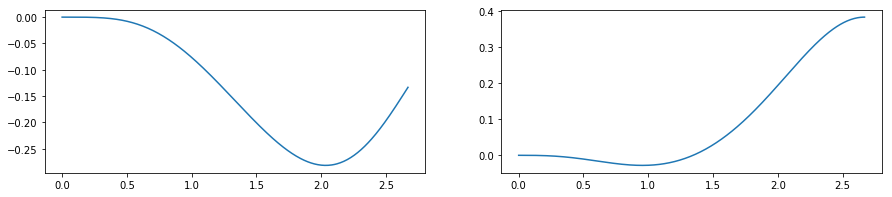

In [186]:
plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.plot(time/41.34, JP)
plt.subplot(122)
plt.plot(time/41.34, JS)

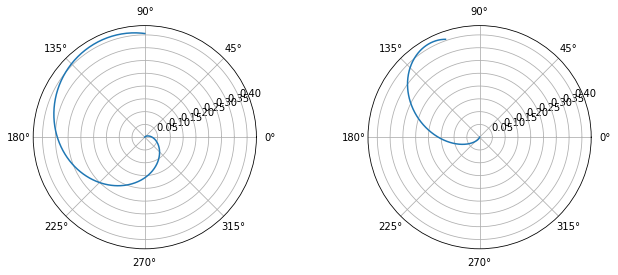

In [210]:
J = np.zeros(time.size, dtype=complex)
J.real = JP
J.imag = JS
plt.figure(figsize=(10,5))
plt.subplot(121,polar=True)
plt.plot(theta, np.abs(J))
plt.subplot(122,polar=True)
plt.plot(np.angle(J), np.abs(J))
plt.subplots_adjust(wspace=0.5)

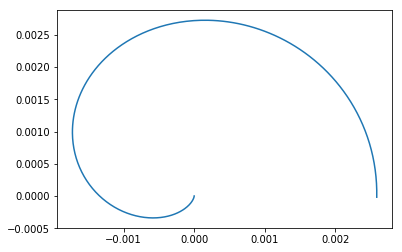

In [209]:
plt.plot(-np.cumsum(Ne*EP), -np.cumsum(Ne*ES))

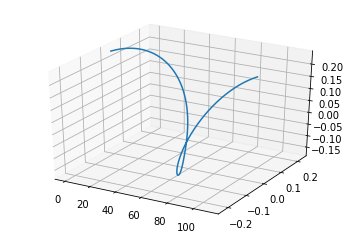

In [213]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(time,EP,ES)  